In [ ]:
# Install CR-VISION package
!python -m pip install git+https://github.com/carnotresearch/cr-vision.git

In [2]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Copy the necessary code to build the model
!cp /content/drive/MyDrive/work/cr-vision/experiments/segmentation/whales/whales.py .

In [ ]:
# Copy and unzip the dataset
!unzip /content/drive/MyDrive/datasets/segmentation/whales.zip

In [5]:
# standard library imports
import pathlib

In [6]:
# Helper functions to plot the images and masks
from cr.vision.plots import plot_images_and_masks

In [7]:
# import the code for this experiment
import whales

In [8]:
# Load the dataset
ds_dir = pathlib.Path('./whales')
images, masks = whales.get_dataset(ds_dir, max_samples=25)

Loading the dataset.
.........................
(25, 384, 384, 3)
(25, 384, 384)
255.0 51.0


In [9]:
# Load the trained model from Google drive
model = whales.load_saved_model()

Loading the saved model from /content/drive/MyDrive/work/cr-vision/experiments/segmentation/whales/sgmt_model


In [10]:
# Use the trained model for predicting the segmentation masks
predictions = model.predict(images)

In [11]:
images.shape, masks.shape, predictions.shape

((25, 384, 384, 3), (25, 384, 384, 1), (25, 384, 384, 1))

In [12]:
images.max(), masks.max(), predictions.max()

(1.0, 1.0, 0.7626616)

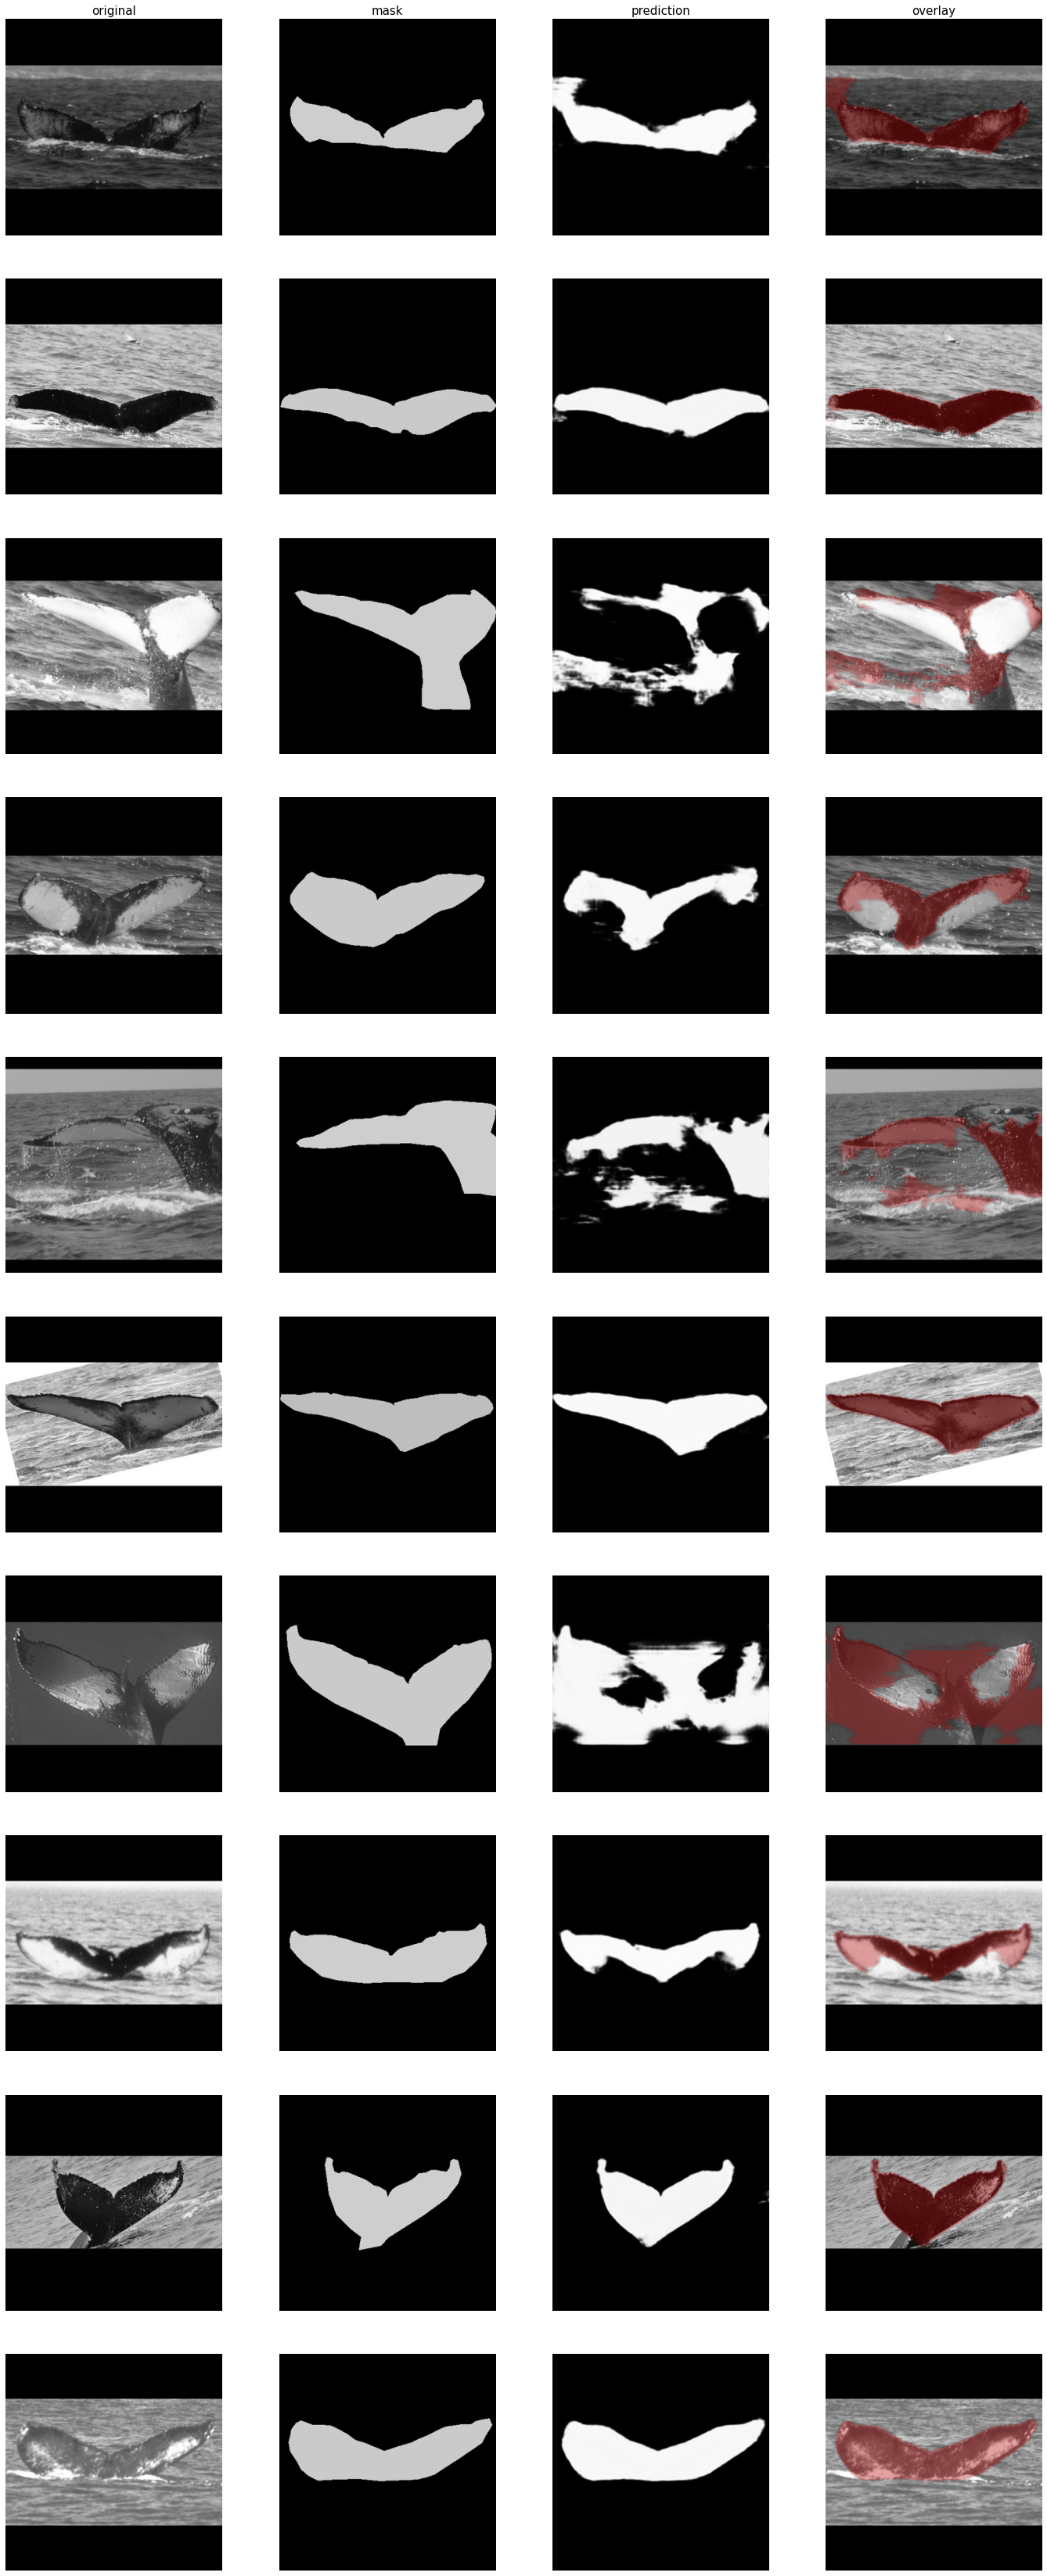

In [14]:
# plot images, original masks, predictions and images overlayed with predicted masks
plot_images_and_masks(images, masks, predictions, num_images_to_plot=10, figsize=6)